<a href="https://colab.research.google.com/github/ted-marlon/Data-Science/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation des packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Exploration du jeu de données

In [2]:
df=pd.read_csv('bank_transactions_data_2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [4]:
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [5]:
df.nunique()

,0
TransactionID,2512
AccountID,495
TransactionAmount,2455
TransactionDate,2512
TransactionType,2
Location,43
DeviceID,681
IP Address,592
MerchantID,100
Channel,3


In [6]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [7]:
# Dictionnaire pour le renommage en français
new_name = {
    'TransactionID': 'id_transaction',
    'AccountID': 'id_compte',
    'TransactionAmount': 'montant',
    'TransactionDate': 'date_transaction',
    'TransactionType': 'type_transaction',
    'Location': 'ville',
    'DeviceID': 'id_appareil',
    'IP Address': 'adresse_ip',
    'MerchantID': 'id_commercant',
    'Channel': 'canal',
    'CustomerAge': 'age_client',
    'CustomerOccupation': 'profession',
    'TransactionDuration': 'duree',
    'LoginAttempts': 'tentatives_connexion',
    'AccountBalance': 'solde_compte',
    'PreviousTransactionDate': 'date_derniere_transaction'
}

# Application du renommage
df.rename(columns=new_name, inplace=True)

# Vérification
print("Colonnes renommées :")
print(df.columns.tolist())
print("\nAperçu des données :")
df.head()

Colonnes renommées :
['id_transaction', 'id_compte', 'montant', 'date_transaction', 'type_transaction', 'ville', 'id_appareil', 'adresse_ip', 'id_commercant', 'canal', 'age_client', 'profession', 'duree', 'tentatives_connexion', 'solde_compte', 'date_derniere_transaction']

Aperçu des données :


,id_transaction,id_compte,montant,date_transaction,type_transaction,ville,id_appareil,adresse_ip,id_commercant,canal,age_client,profession,duree,tentatives_connexion,solde_compte,date_derniere_transaction
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


Il semble que notre jeu de données possède 2512 observations pour 15 variables.De plus, nous observons aucune valeurs manquantes dans notre base de données..
Aussi, nous constatons l'absence de la variable Fraude.Ce qui signifie que notre jeu de données est non étiquettée et que nous sômmes devant un jeu de données non étiquetté.Par conséquent, nous sômmes dans le cas de l'apprentissage non supervisé.
Continuons avec l'analyse uni-varié de nos différentes variables.

# Analyse univariée des différentes variables


In [8]:
cat_var = [
    'type_transaction',  # Débit/Crédit
    'ville',             # Lieu de la transaction
    'canal',             # Branch/ATM/Online
    'profession'         # Métier du client
]

num_var = [
    'montant',               # Montant de la transaction
    'age_client',            # Âge du client
    'duree',                 # Durée de la transaction
    'tentatives_connexion',  # Nombre de tentatives de login
    'solde_compte'           # Solde du compte avant transaction
]

var_ids = [
    'id_transaction',    # Identifiant unique de transaction (clé primaire)
    'id_compte',         # Identifiant du compte bancaire
    'id_appareil',       # Identifiant de l'appareil utilisé
    'adresse_ip',        # Adresse IP de connexion
    'id_commercant'      # Identifiant du marchand
]

# Analyse des variables catégorielles

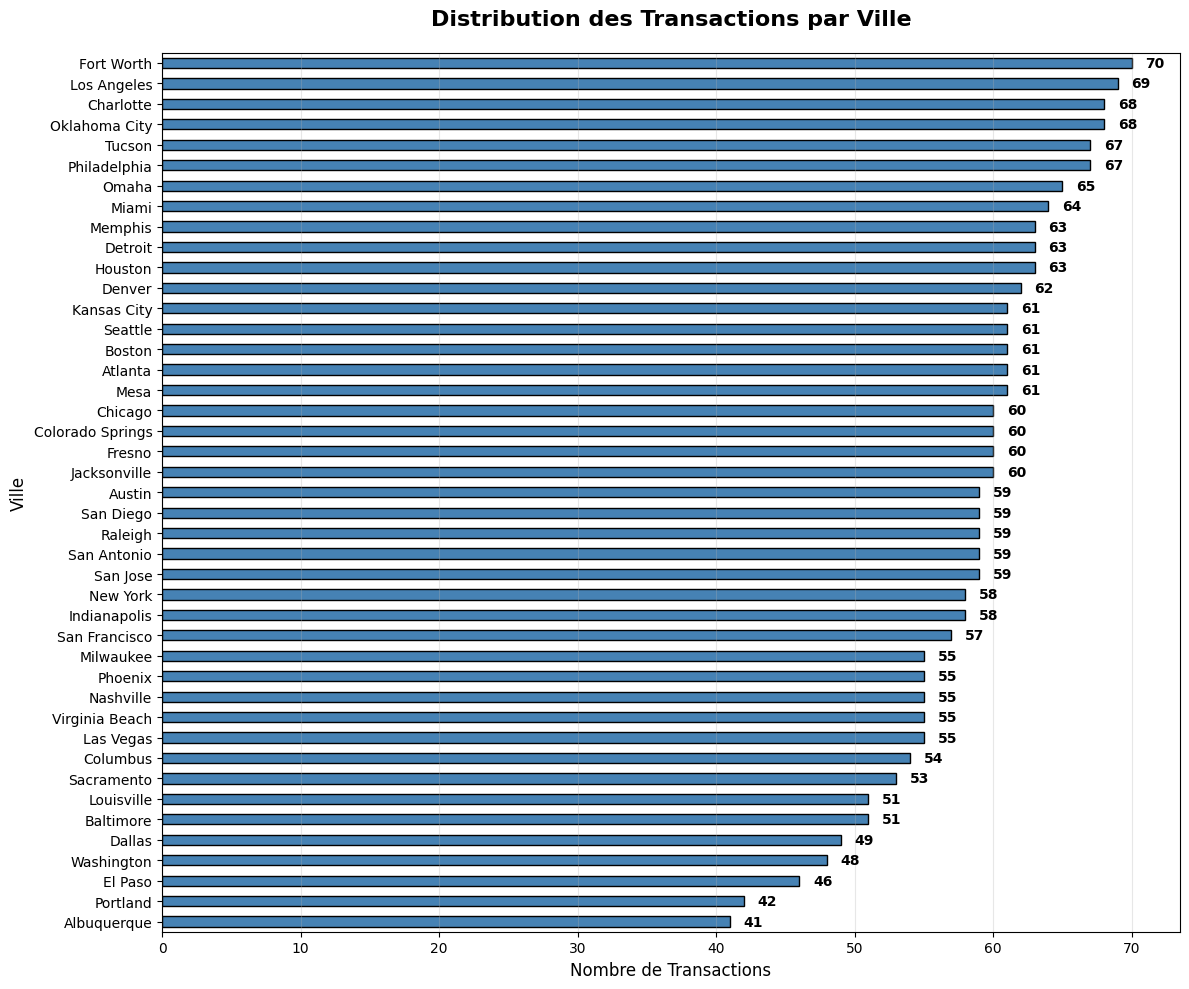

In [9]:
plt.figure(figsize=(12, 10))
# Trier par fréquence décroissante

ville_counts = df['ville'].value_counts().sort_values(ascending=True)

ax = ville_counts.plot(kind='barh', color='steelblue', edgecolor='black')

# Ajouter les valeurs sur les barres
for i, v in enumerate(ville_counts):
    ax.text(v + 1, i, str(v), ha='left', va='center', fontweight='bold', fontsize=10)

plt.title('Distribution des Transactions par Ville', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Nombre de Transactions', fontsize=12)
plt.ylabel('Ville', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3271875967.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, ax=axes[0], palette=custom_palette)


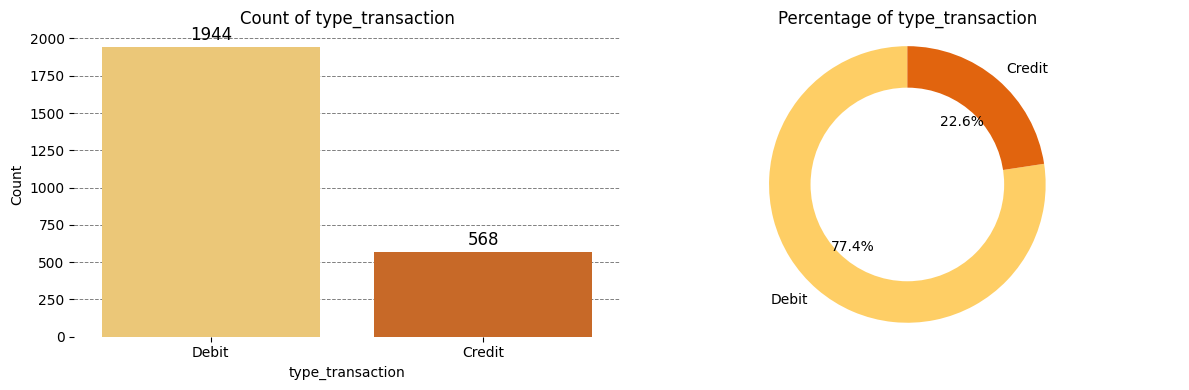

In [10]:
def plot_categorical_distribution(df, feature, palette="YlOrBr"):
    num_categories = len(df[feature].unique())

    custom_palette = sns.color_palette(palette, num_categories)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.countplot(x=feature, data=df, ax=axes[0], palette=custom_palette)
    axes[0].set_title(f'Count of {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Count')

    for p in axes[0].patches:
        axes[0].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='baseline',
                         color='black', fontsize=12,
                         xytext=(0, 5),
                         textcoords='offset points')

    axes[0].set_axisbelow(True)
    axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
    sns.despine(left=True, bottom=True)

    # Pie Chart
    feature_counts = df[feature].value_counts()
    wedges, texts, autotexts = axes[1].pie(
        feature_counts,
        labels=feature_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=custom_palette
    )

    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)
    axes[1].set_title(f'Percentage of {feature}')
    axes[1].axis('equal')
    plt.tight_layout()
    plt.show()

plot_categorical_distribution(df, 'type_transaction')

Le graphique à barres montre clairement que les transactions de débit sont nettement plus fréquentes que les transactions de crédit. Le nombre de transactions de débit est d'environ 1944, contre environ 568 pour les transactions de crédit. Cela représente environ 77,4 % du total des transactions pour les débits et environ 22,6 % pour les crédits.

/tmp/ipython-input-3271875967.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, ax=axes[0], palette=custom_palette)


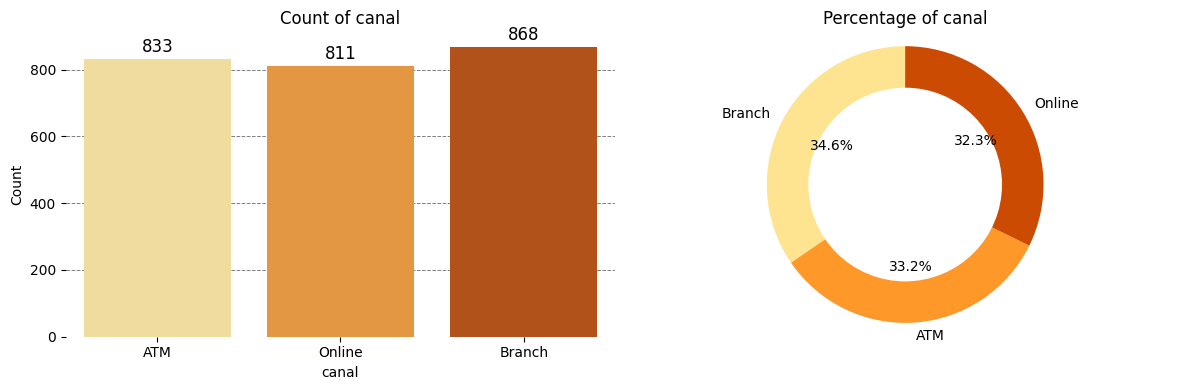

In [11]:
plot_categorical_distribution(df, 'canal')

Le graphique à barres et le diagramme circulaire montrent une répartition relativement équilibrée des transactions entre les trois canaux : guichets automatiques, internet et agences bancaires. Les transactions effectuées en agence semblent être les plus fréquentes, suivies des transactions par guichet automatique et enfin des transactions en ligne. Cependant, la différence de volume de transactions entre les différents canaux n'est pas très importante.

/tmp/ipython-input-3271875967.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, ax=axes[0], palette=custom_palette)


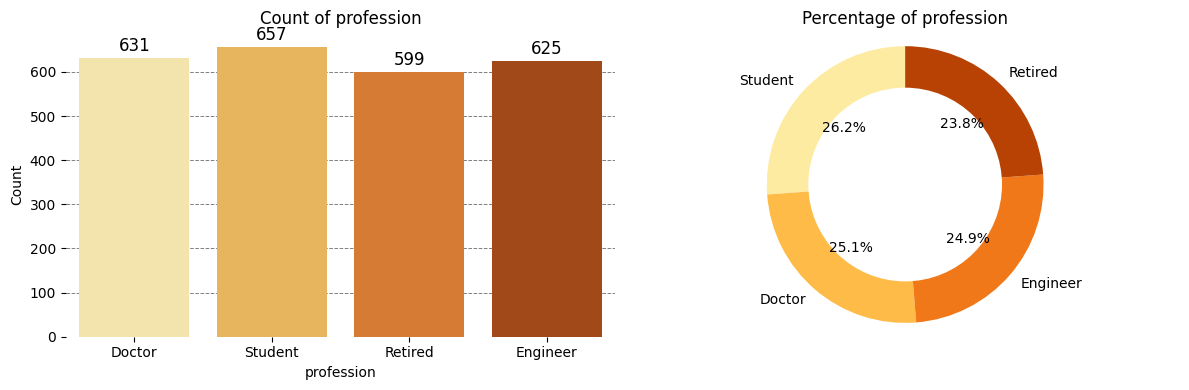

In [12]:
plot_categorical_distribution(df, 'profession')

Le graphique à barres et le diagramme circulaire montrent une répartition relativement équilibrée entre les quatre professions représentées : médecin, étudiant, retraité et ingénieur. Les catégories « étudiant » et « médecin » affichent le plus grand nombre de transactions, la catégorie « étudiant » étant légèrement en tête.

# Analyse des variables numériques

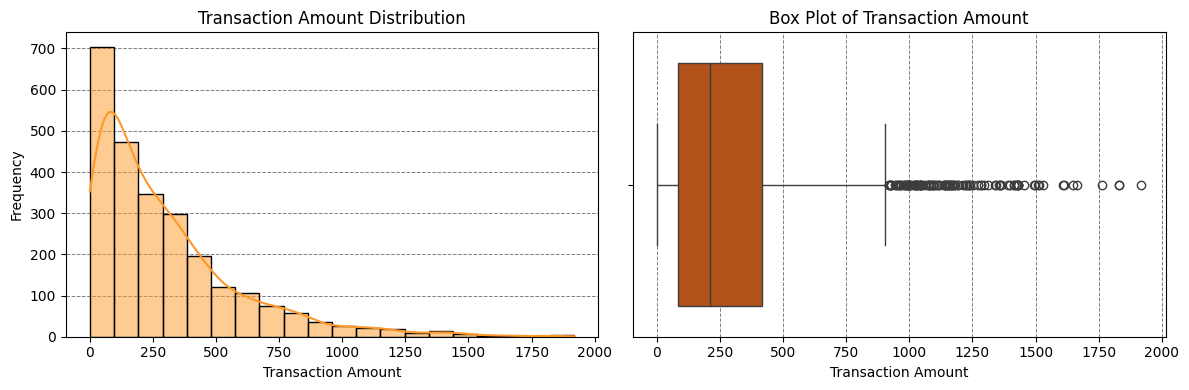


Summary Statistics for Transaction Amount:
 count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: montant, dtype: float64


In [13]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['montant'], bins=20, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('Transaction Amount Distribution')
axes[0].set_xlabel('Transaction Amount')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['montant'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Transaction Amount')
axes[1].set_xlabel('Transaction Amount')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Transaction Amount:\n', df['montant'].describe())

L'histogramme montre clairement une distribution asymétrique à droite. Cela signifie qu'il y a beaucoup de petites transactions et quelques transactions très importantes. C'est un pattern courant dans les données financières, où la majorité des transactions sont relativement petites, tandis qu'une plus petite proportion concerne des montants plus élevés.

Le box plot confirme la présence de valeurs aberrantes. La longue queue sur le côté droit du box plot indique la présence de valeurs significativement plus élevées que la majorité des points de données. Ces valeurs aberrantes pourraient représenter des transactions inhabituelles ou potentiellement frauduleuses.

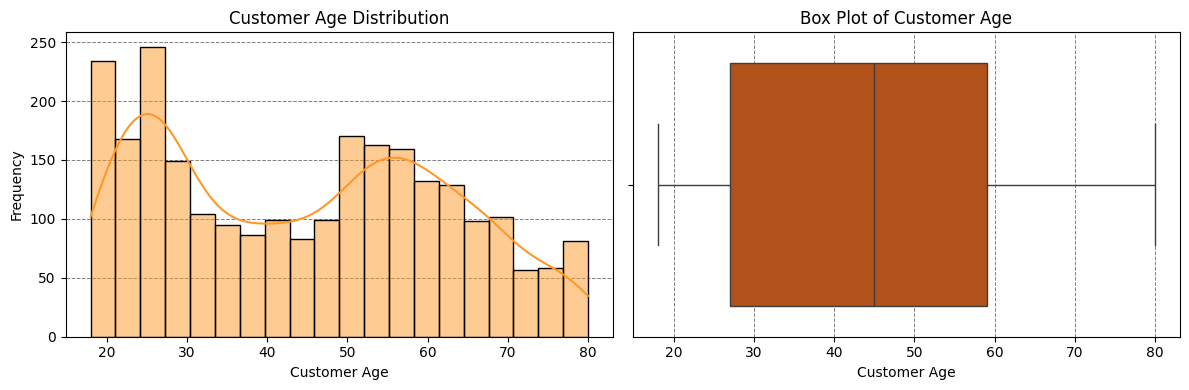


Summary Statistics for Customer Age:
 count    2512.000000
mean       44.673965
std        17.792198
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: age_client, dtype: float64


In [14]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['age_client'], bins=20, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('Customer Age Distribution')
axes[0].set_xlabel('Customer Age')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['age_client'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Customer Age')
axes[1].set_xlabel('Customer Age')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Customer Age:\n', df['age_client'].describe())

L'histogramme suggère une distribution des âges des clients relativement symétrique, avec un pic légèrement plus important autour de la quarantaine. Cela indique que la clientèle est répartie de manière relativement uniforme entre les différentes tranches d'âge. Le diagramme en boîte ne révèle aucun point extrême. Les « barres de dispersion » atteignent les valeurs minimales et maximales dans une fourchette raisonnable, ce qui suggère que la distribution des âges est relativement équilibrée.

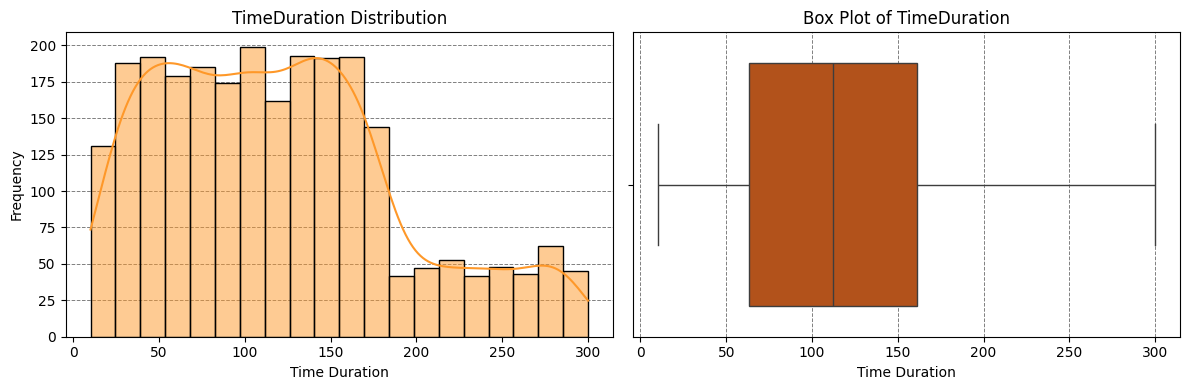


Summary Statistics for Customer Age:
 count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: duree, dtype: float64


In [15]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['duree'], bins=20, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('TimeDuration Distribution')
axes[0].set_xlabel('Time Duration')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['duree'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of TimeDuration')
axes[1].set_xlabel('Time Duration')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Customer Age:\n', df['duree'].describe())

L'histogramme suggère une distribution des durées de transaction globalement symétrique, avec un pic légèrement plus important au milieu de la plage de valeurs. Cela indique que la plupart des transactions durent un temps relativement modéré. Le diagramme en boîte ne révèle aucune valeur aberrante. Les « barres de dispersion » atteignent les valeurs minimales et maximales dans une plage raisonnable, ce qui suggère une distribution relativement équilibrée.

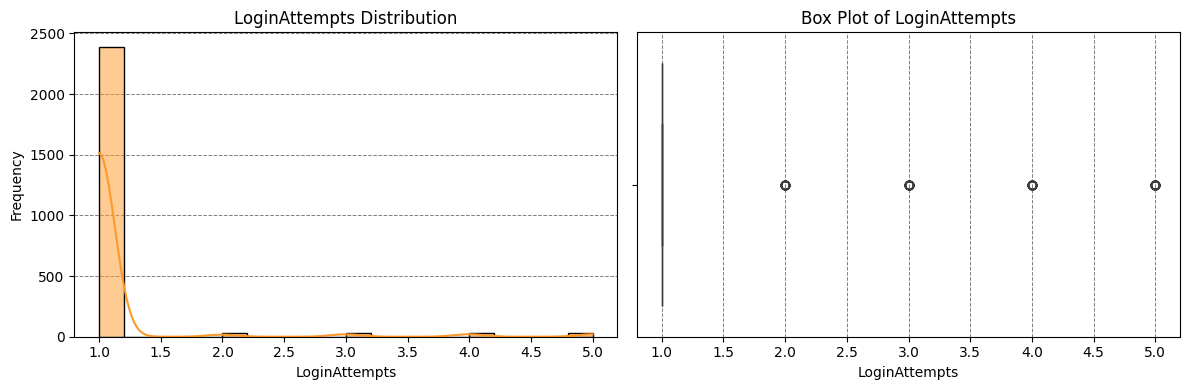


Summary Statistics for Customer Age:
 count    2512.000000
mean        1.124602
std         0.602662
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: tentatives_connexion, dtype: float64


In [16]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['tentatives_connexion'], bins=20, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('LoginAttempts Distribution')
axes[0].set_xlabel('LoginAttempts')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['tentatives_connexion'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of LoginAttempts')
axes[1].set_xlabel('LoginAttempts')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Customer Age:\n', df['tentatives_connexion'].describe())

L’histogramme et le diagramme en boîte montrent clairement que la distribution des tentatives de connexion est fortement asymétrique, avec un pic autour de 1. Cela signifie que la grande majorité des transactions sont précédées d’une seule tentative de connexion. Le diagramme en boîte révèle également la présence de quelques valeurs aberrantes, correspondant à un nombre plus élevé de tentatives de connexion. Ces cas pourraient représenter des situations où plusieurs tentatives de connexion infructueuses ont précédé une transaction réussie, ce qui justifierait des investigations complémentaires.

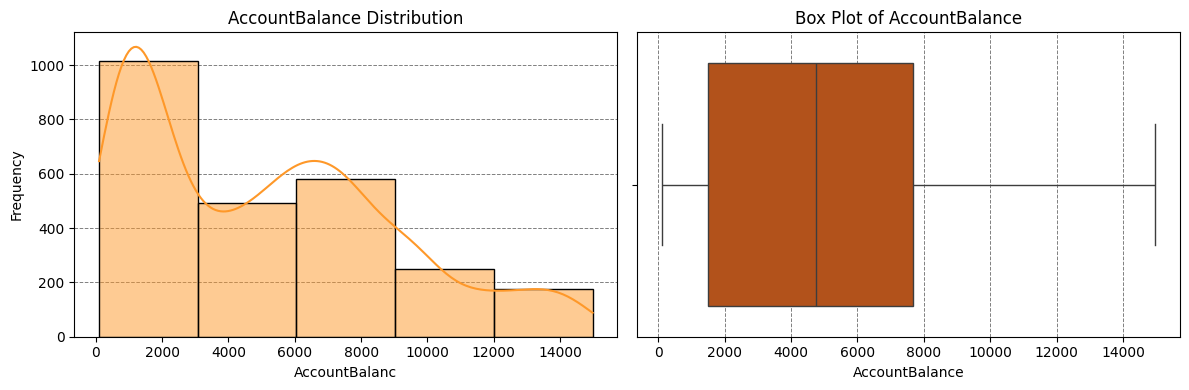


Summary Statistics for AccountBalance Distribution Age:
 count     2512.000000
mean      5114.302966
std       3900.942499
min        101.250000
25%       1504.370000
50%       4735.510000
75%       7678.820000
max      14977.990000
Name: solde_compte, dtype: float64


In [17]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['solde_compte'], bins=5, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('AccountBalance Distribution')
axes[0].set_xlabel('AccountBalanc')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['solde_compte'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of AccountBalance')
axes[1].set_xlabel('AccountBalance')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for AccountBalance Distribution Age:\n', df['solde_compte'].describe())

L'histogramme révèle une distribution asymétrique à droite, ce qui signifie qu'une majorité des comptes présentent des soldes faibles, tandis qu'une minorité affiche des soldes nettement plus élevés. Le BoxPlot confirme la présence de valeurs aberrantes. La longue « queue » à droite du diagramme indique la présence de valeurs bien supérieures à la moyenne. Ces valeurs aberrantes pourraient correspondre à des comptes présentant des soldes exceptionnellement élevés.

date_transaction
2023-01-02    19
2023-01-03     9
2023-01-04     4
2023-01-05     8
2023-01-06     7
              ..
2023-12-26     5
2023-12-27     4
2023-12-28     7
2023-12-29     9
2024-01-01    13
Length: 261, dtype: int64


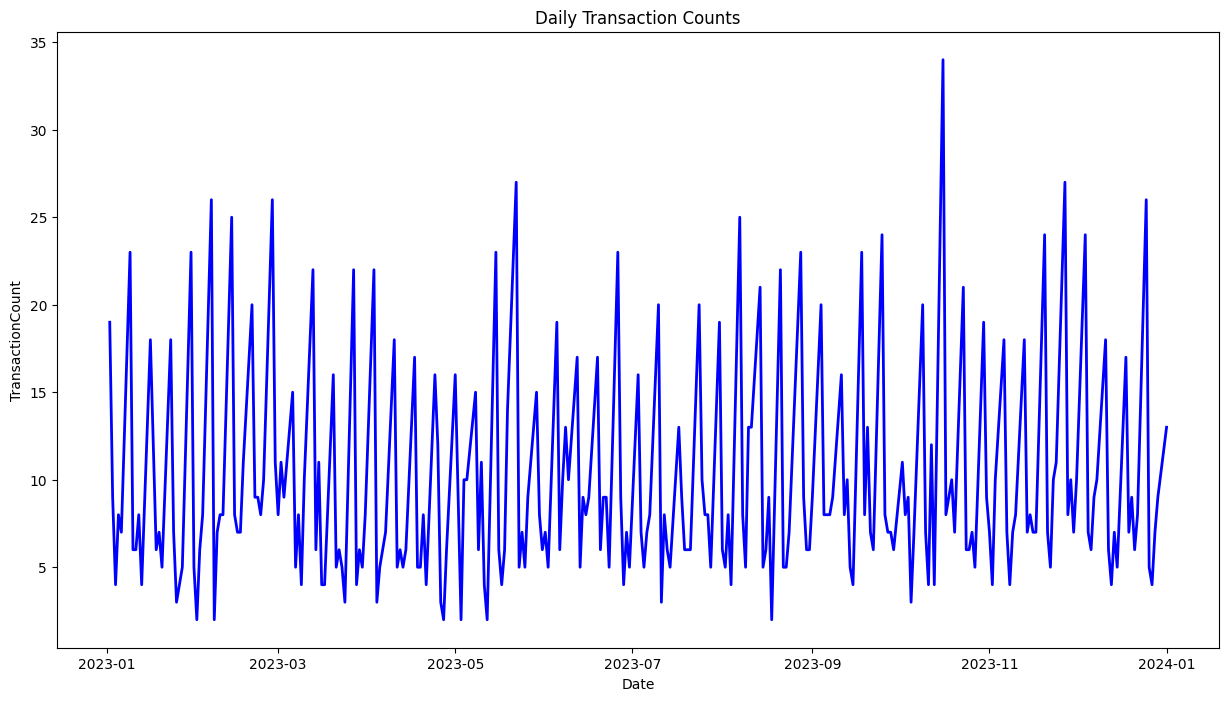

In [31]:
from datetime import datetime

df['date_transaction'] = pd.to_datetime(df['date_transaction'])
df['date_transaction'] = df['date_transaction'].dt.date
daily_counts = df.groupby('date_transaction').size() #count gives count of each column in the dataframe
print(daily_counts)
plt.figure(figsize=(15,8))
daily_counts.plot(title='Daily Transaction Counts', color='blue', linewidth=2)
plt.xlabel('Date')
plt.ylabel('TransactionCount')
plt.show()

Ce graphique montre une érosion alarmante de l'activité sur un an. Le nombre de transactions quotidiennes, après des pics à 35 début 2023, s'effondre à moins de 5 début 2024. La tendance est clairement baissière, marquée par une volatilité extrême, signalant potentiellement une perte d'engagement ou des problèmes structurels.

0         Tuesday
1         Tuesday
2          Monday
3          Friday
4          Monday
          ...    
2507    Wednesday
2508    Wednesday
2509       Monday
2510       Friday
2511      Tuesday
Name: DayOfWeek, Length: 2512, dtype: object


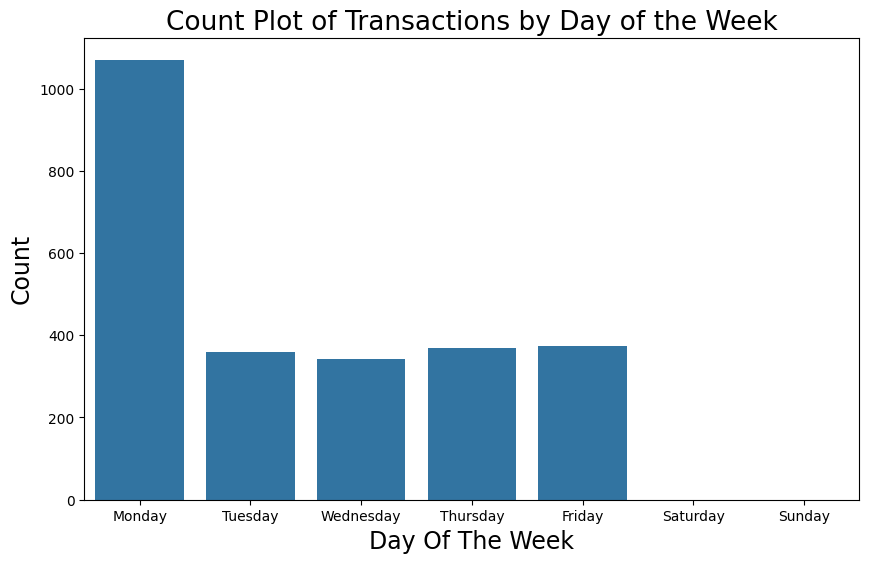

In [32]:
df['date_transaction'] = pd.to_datetime(df['date_transaction'])
df['DayOfWeek'] = df['date_transaction'].dt.day_name()
print(df['DayOfWeek'])
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='DayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Count Plot of Transactions by Day of the Week', fontsize=19)
plt.xlabel('Day Of The Week', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.show()

Nous pouvons voir clairement la répartition des jours de la semaine de la variable date_transaction. Nous constatons aisement que la plupart des transactions ont lieu le lundi..De plus, nous observons aucune transaction le week-end.Cela peut se justifier par le fait que les banques sont fermées le week-end

# Analyse Bi-variée

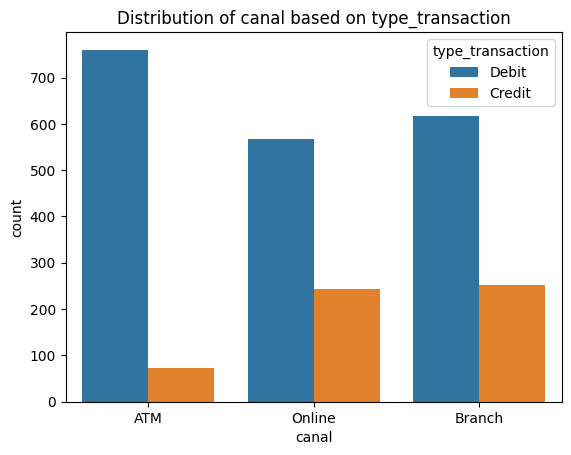

In [18]:
sns.countplot(data=df,x='canal',hue='type_transaction')
plt.title('Distribution of canal based on type_transaction')
plt.show()

<Figure size 1200x800 with 0 Axes>

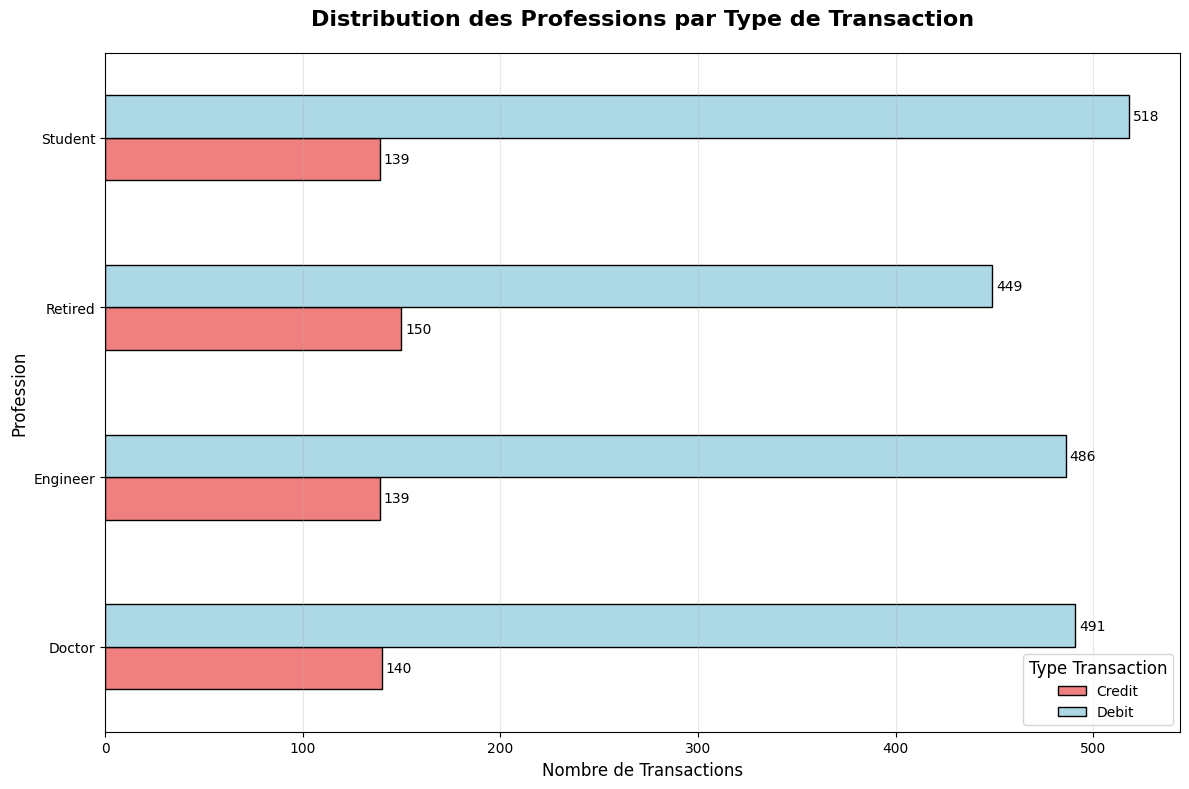

In [19]:
plt.figure(figsize=(12, 8))
# Préparer les données
count_data = df.groupby(['profession', 'type_transaction']).size().unstack(fill_value=0)

# Créer le diagramme horizontal
ax = count_data.plot(kind='barh', color=['lightcoral', 'lightblue'], edgecolor='black', figsize=(12, 8))

# Ajouter les valeurs sur les barres
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3, fontsize=10)

plt.title('Distribution des Professions par Type de Transaction', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Nombre de Transactions', fontsize=12)
plt.ylabel('Profession', fontsize=12)
plt.legend(title='Type Transaction', title_fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

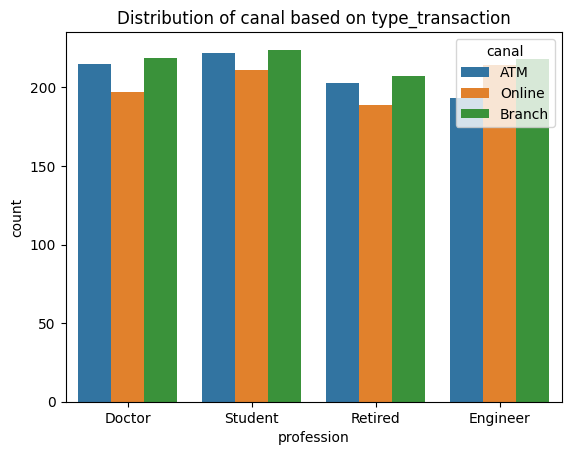

In [20]:
sns.countplot(data=df,x='profession',hue='canal')
plt.title('Distribution of canal based on type_transaction')
plt.show()

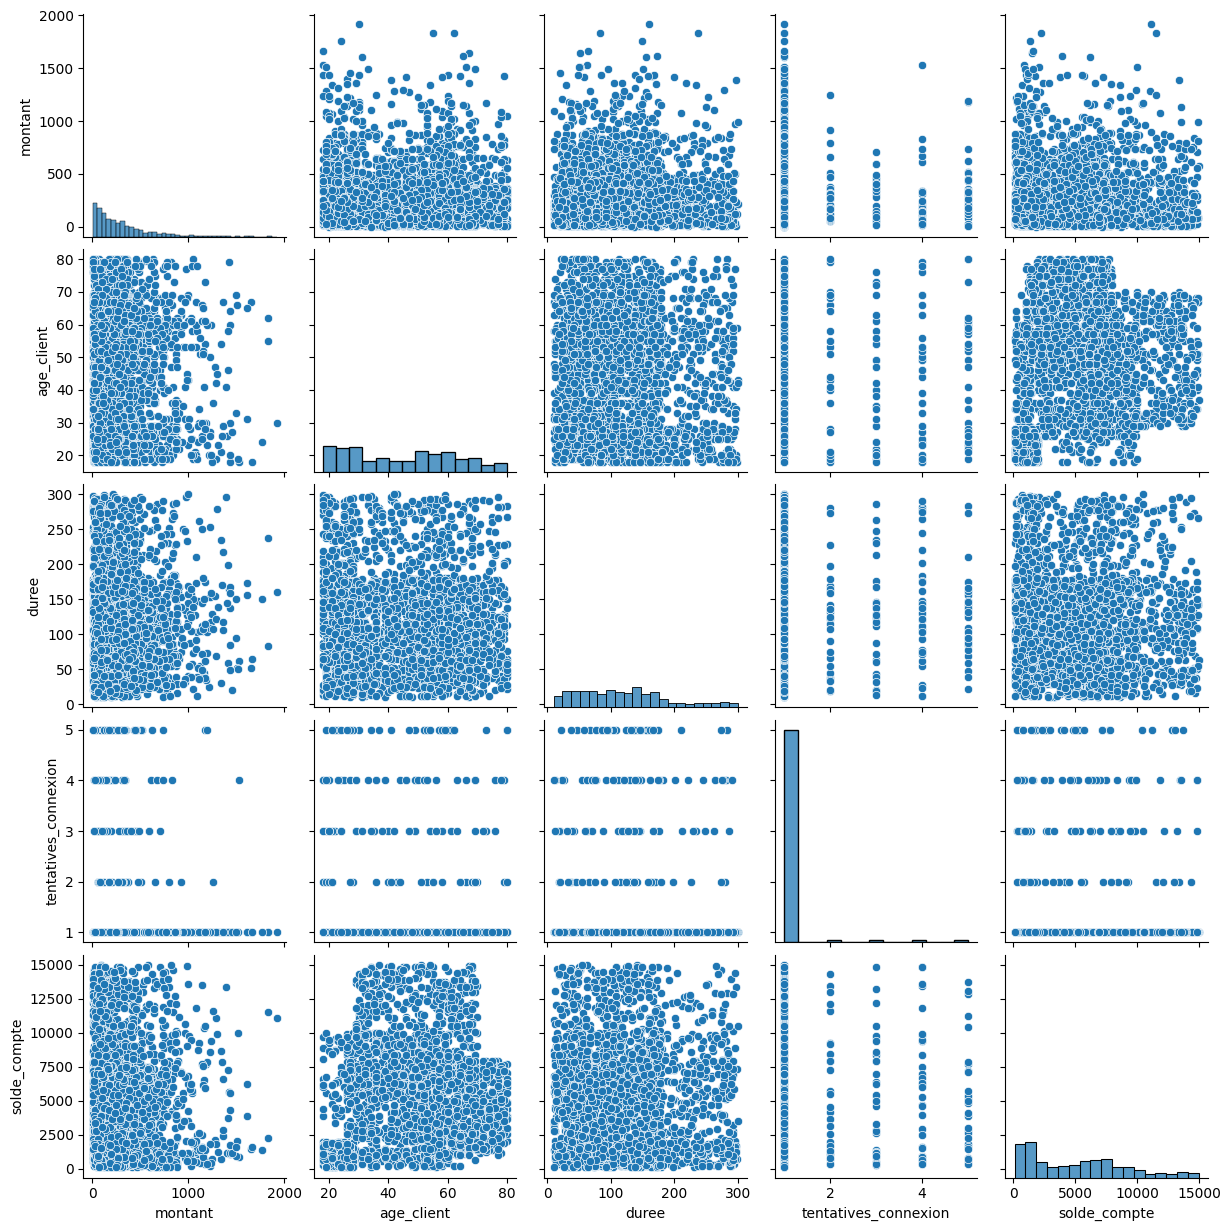

In [21]:
# Graphiques bivariés
sns.pairplot(df[ num_var])
plt.show()

In [22]:
df[num_var].describe()

,montant,age_client,duree,tentatives_connexion,solde_compte
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


/tmp/ipython-input-762253881.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type_transaction', y=var, ax=axes[i],
/tmp/ipython-input-762253881.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type_transaction', y=var, ax=axes[i],
/tmp/ipython-input-762253881.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type_transaction', y=var, ax=axes[i],
/tmp/ipython-input-762253881.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the

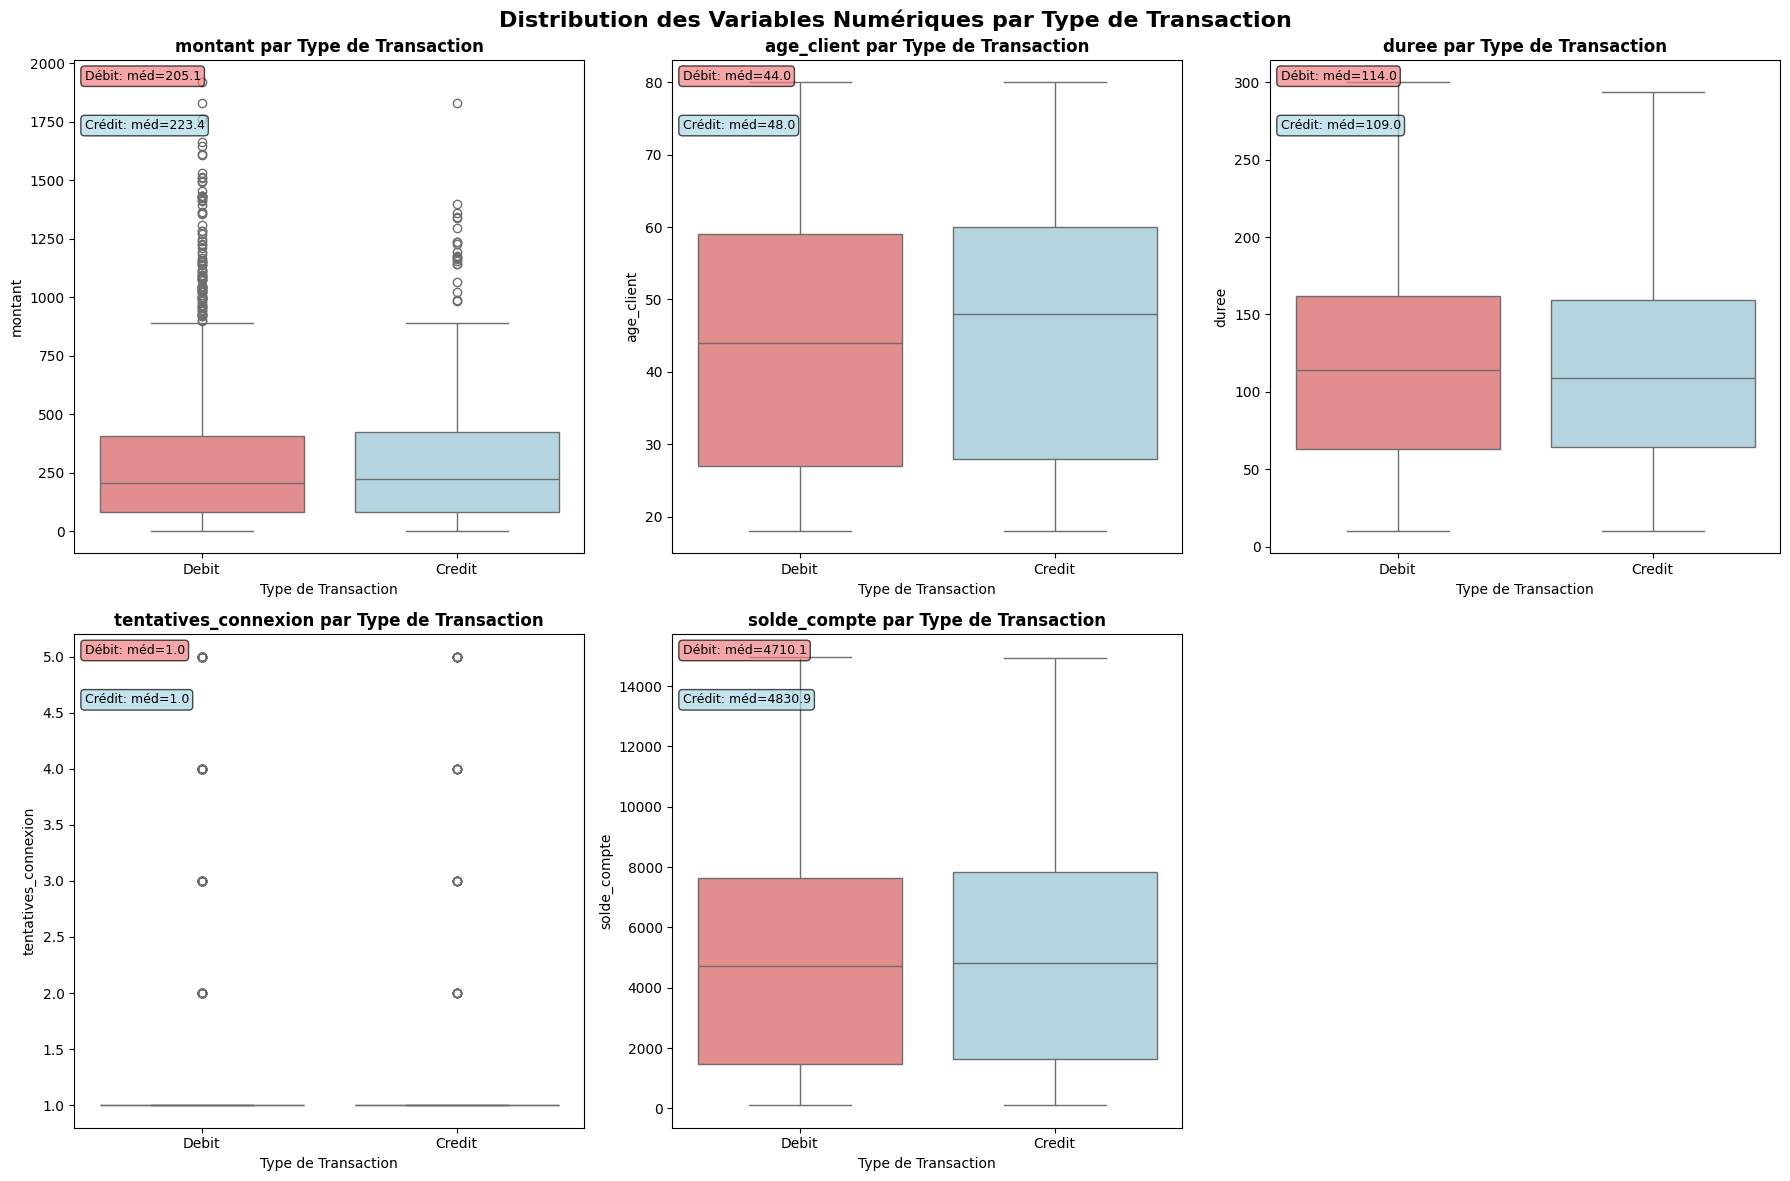

In [23]:
# Configuration des graphiques
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution des Variables Numériques par Type de Transaction',
             fontsize=16, fontweight='bold')
axes = axes.ravel()

variables_a_analyser = ['montant', 'age_client', 'duree', 'tentatives_connexion', 'solde_compte']

for i, var in enumerate(variables_a_analyser):
    sns.boxplot(data=df, x='type_transaction', y=var, ax=axes[i],
                palette={'Debit': 'lightcoral', 'Credit': 'lightblue'})
    axes[i].set_title(f'{var} par Type de Transaction', fontweight='bold')
    axes[i].set_xlabel('Type de Transaction')
    axes[i].set_ylabel(var)

    # Ajouter des annotations statistiques
    debit_stats = df[df['type_transaction'] == 'Debit'][var].describe()
    credit_stats = df[df['type_transaction'] == 'Credit'][var].describe()
    axes[i].text(0.02, 0.98, f"Débit: méd={debit_stats['50%']:.1f}",
                transform=axes[i].transAxes, va='top', fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7))
    axes[i].text(0.02, 0.88, f"Crédit: méd={credit_stats['50%']:.1f}",
                transform=axes[i].transAxes, va='top', fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

# Cacher le dernier subplot inutilisé
axes[5].set_visible(False)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3134615136.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='canal', y=var, ax=axes[i],
/tmp/ipython-input-3134615136.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='canal', y=var, ax=axes[i],
/tmp/ipython-input-3134615136.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='canal', y=var, ax=axes[i],
/tmp/ipython-input-3134615136.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `l

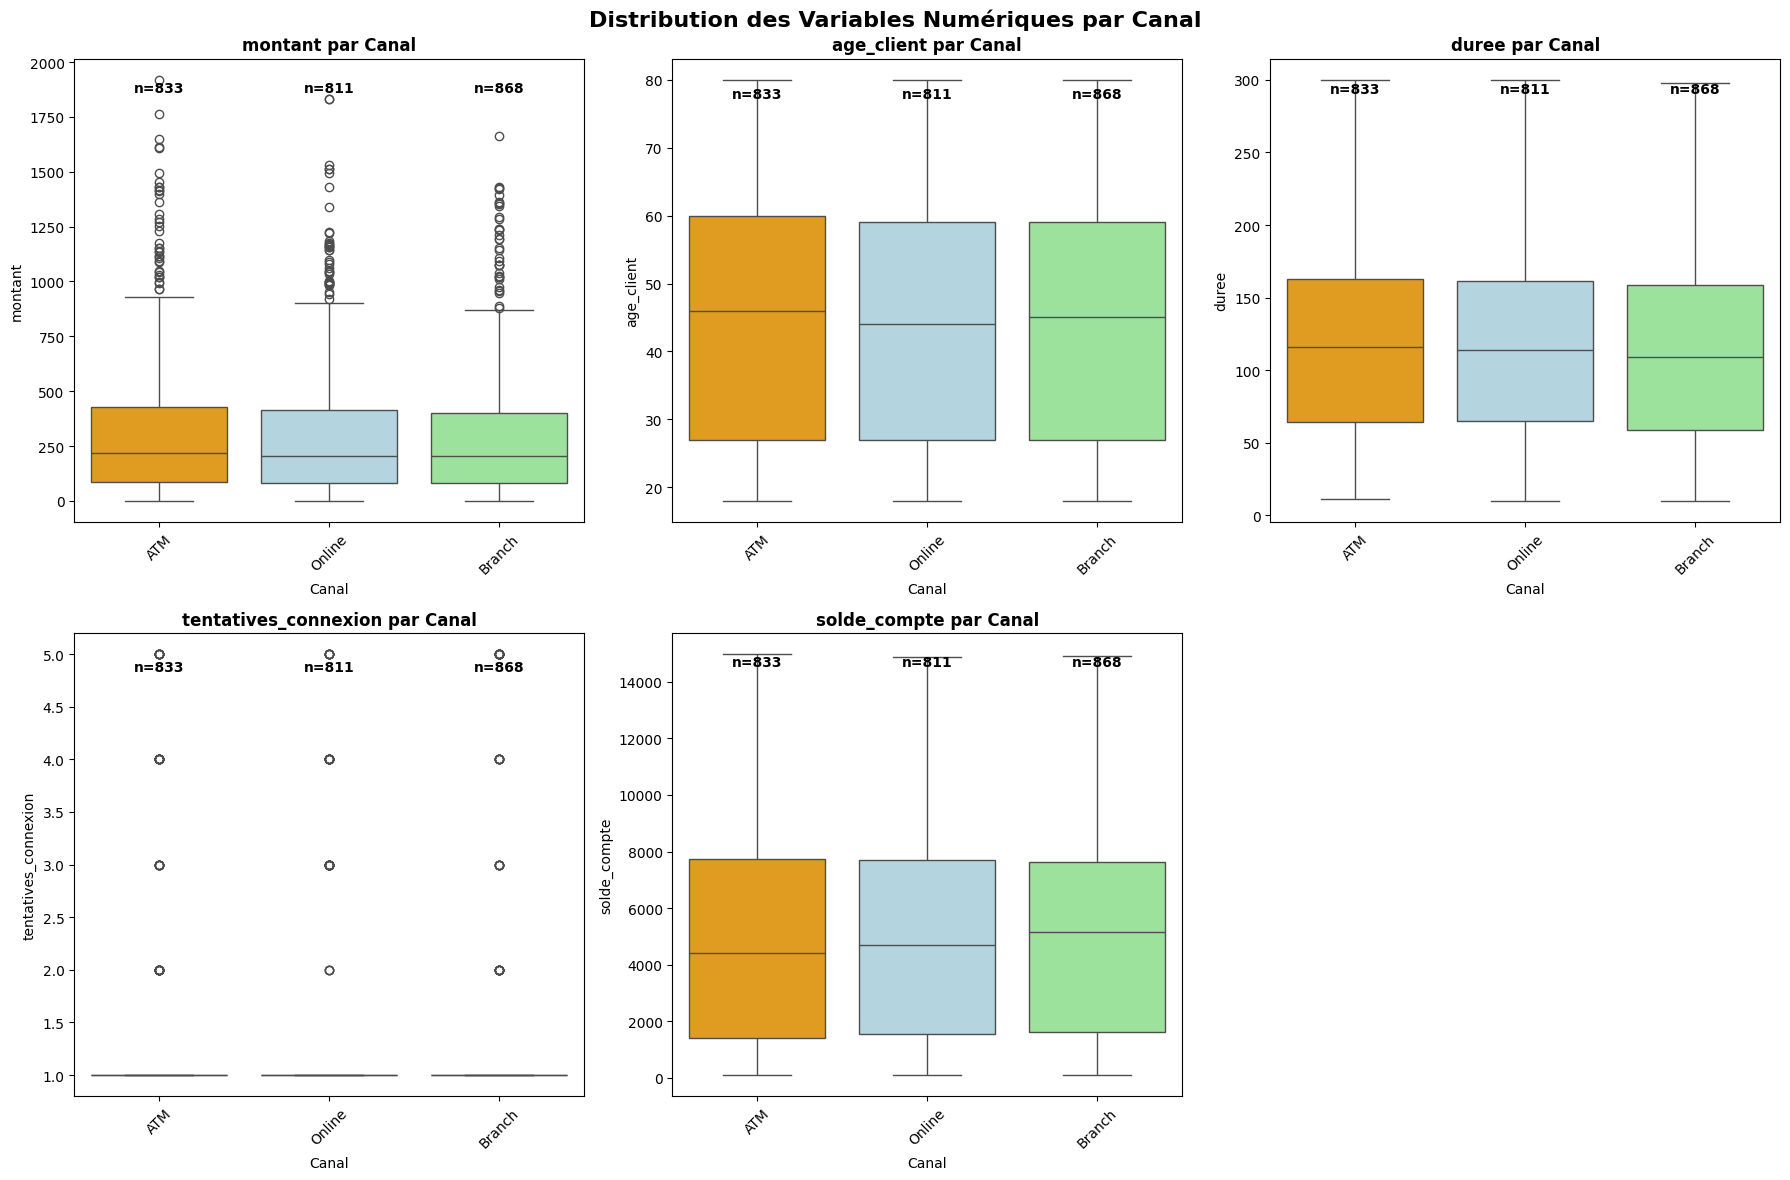

In [24]:
# Boxplots par canal
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution des Variables Numériques par Canal',
             fontsize=16, fontweight='bold')
axes = axes.ravel()

for i, var in enumerate(variables_a_analyser):
    sns.boxplot(data=df, x='canal', y=var, ax=axes[i],
                palette={'Branch': 'lightgreen', 'ATM': 'orange', 'Online': 'lightblue'})
    axes[i].set_title(f'{var} par Canal', fontweight='bold')
    axes[i].set_xlabel('Canal')
    axes[i].set_ylabel(var)
    axes[i].tick_params(axis='x', rotation=45)

    # Ajouter le nombre d'observations
    for j, canal in enumerate(df['canal'].unique()):
        count = len(df[df['canal'] == canal])
        axes[i].text(j, axes[i].get_ylim()[1]*0.95, f'n={count}',
                    ha='center', va='top', fontweight='bold')

# Cacher le dernier subplot inutilisé
axes[5].set_visible(False)
plt.tight_layout()
plt.show()

/tmp/ipython-input-574891746.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='profession', y=var, ax=axes[i],
/tmp/ipython-input-574891746.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='profession', y=var, ax=axes[i],
/tmp/ipython-input-574891746.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='profession', y=var, ax=axes[i],
/tmp/ipython-input-574891746.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue`

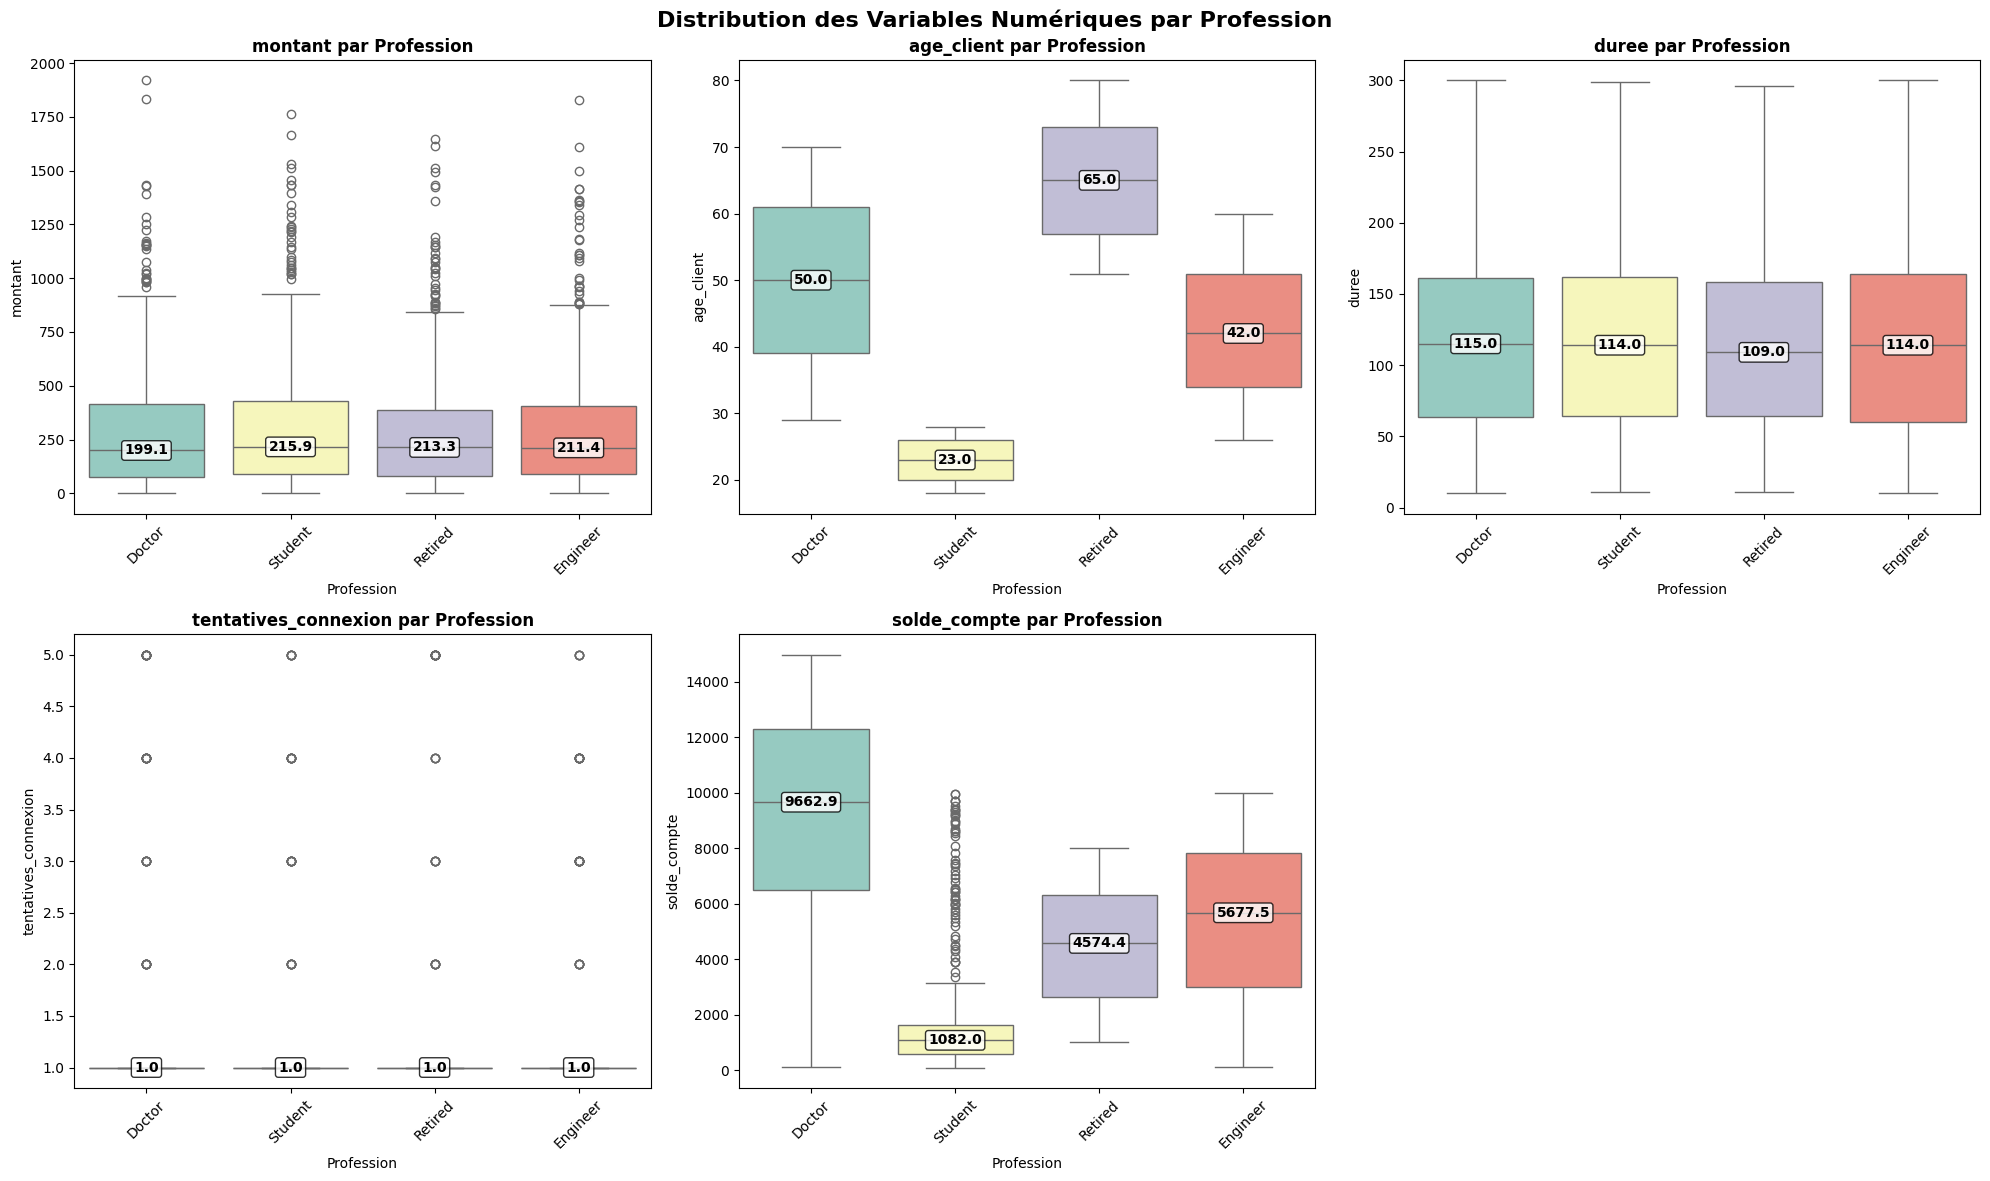

In [25]:
# Boxplots par profession
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Distribution des Variables Numériques par Profession',
             fontsize=16, fontweight='bold')
axes = axes.ravel()

for i, var in enumerate(variables_a_analyser):
    sns.boxplot(data=df, x='profession', y=var, ax=axes[i],
                palette='Set3')
    axes[i].set_title(f'{var} par Profession', fontweight='bold')
    axes[i].set_xlabel('Profession')
    axes[i].set_ylabel(var)
    axes[i].tick_params(axis='x', rotation=45)

    # Ajouter la médiane pour chaque profession
    professions = df['profession'].unique()
    for j, profession in enumerate(professions):
        median_val = df[df['profession'] == profession][var].median()
        axes[i].text(j, median_val, f'{median_val:.1f}',
                    ha='center', va='center', fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

# Cacher le dernier subplot inutilisé
axes[5].set_visible(False)
plt.tight_layout()
plt.show()

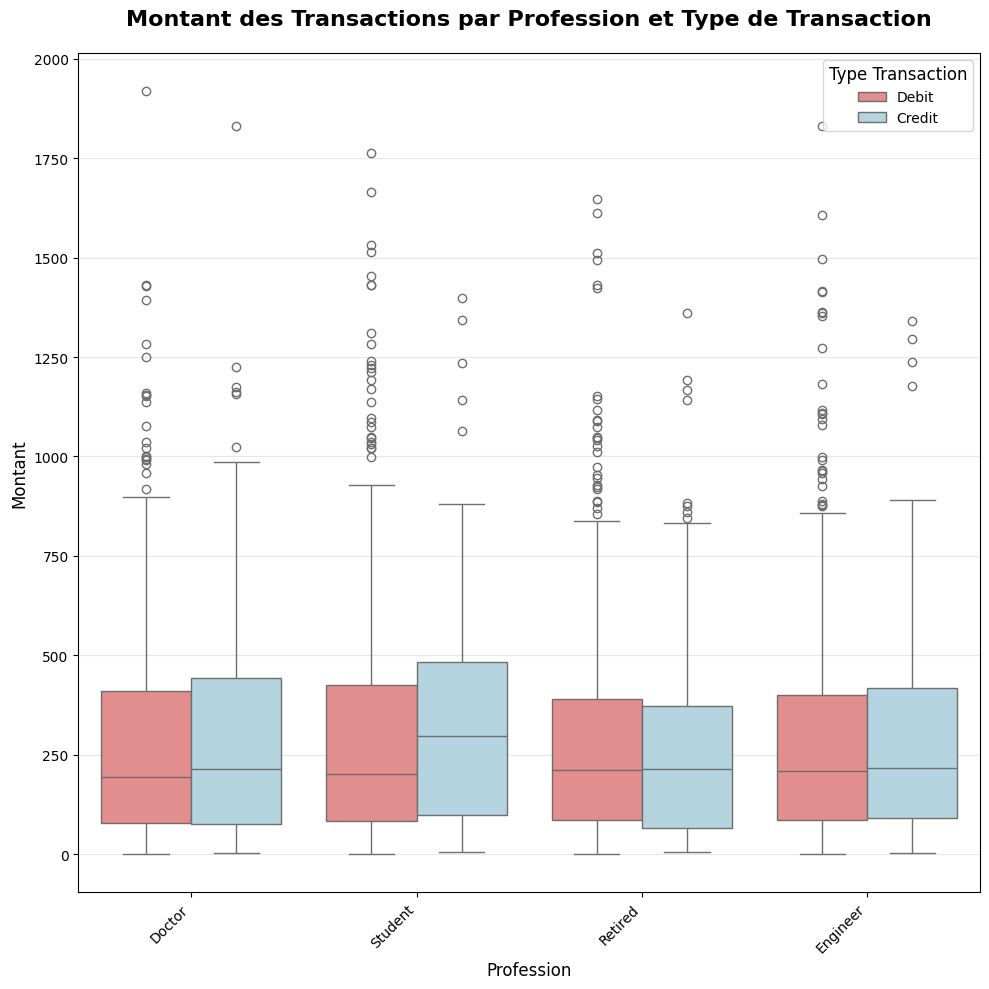

In [26]:
# Analyse plus détaillée avec deux variables catégorielles
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='profession', y='montant', hue='type_transaction',
            palette={'Debit': 'lightcoral', 'Credit': 'lightblue'})
plt.title('Montant des Transactions par Profession et Type de Transaction',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Profession', fontsize=12)
plt.ylabel('Montant', fontsize=12)
plt.legend(title='Type Transaction', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [27]:
# Statistiques détaillées pour analysis quantitative
print("📊 STATISTIQUES PAR CATÉGORIES")
print("="*50)

for var in variables_a_analyser:
    print(f"\n🔍 {var.upper()} :")
    print("-" * 30)

    # Par type de transaction
    print("Par Type de Transaction:")
    print(df.groupby('type_transaction')[var].describe().round(2))

    # Par canal
    print("\nPar Canal:")
    print(df.groupby('canal')[var].describe().round(2))

    # Par profession
    print("\nPar Profession:")
    print(df.groupby('profession')[var].describe().round(2))

📊 STATISTIQUES PAR CATÉGORIES

🔍 MONTANT :
------------------------------
Par Type de Transaction:
                   count    mean     std   min    25%     50%     75%      max
type_transaction                                                              
Credit             568.0  306.50  290.03  2.03  80.01  223.36  425.22  1831.02
Debit             1944.0  294.99  292.53  0.26  83.14  205.14  407.78  1919.11

Par Canal:
        count    mean     std   min    25%     50%     75%      max
canal                                                              
ATM     833.0  307.72  303.51  0.32  84.89  218.96  427.69  1919.11
Branch  868.0  288.23  279.19  0.45  83.20  204.16  401.94  1664.33
Online  811.0  297.21  293.20  0.26  79.34  206.63  414.63  1831.02

Par Profession:
            count    mean     std   min    25%     50%     75%      max
profession                                                             
Doctor      631.0  292.70  292.45  1.14  77.54  199.09  414.70  1919.11


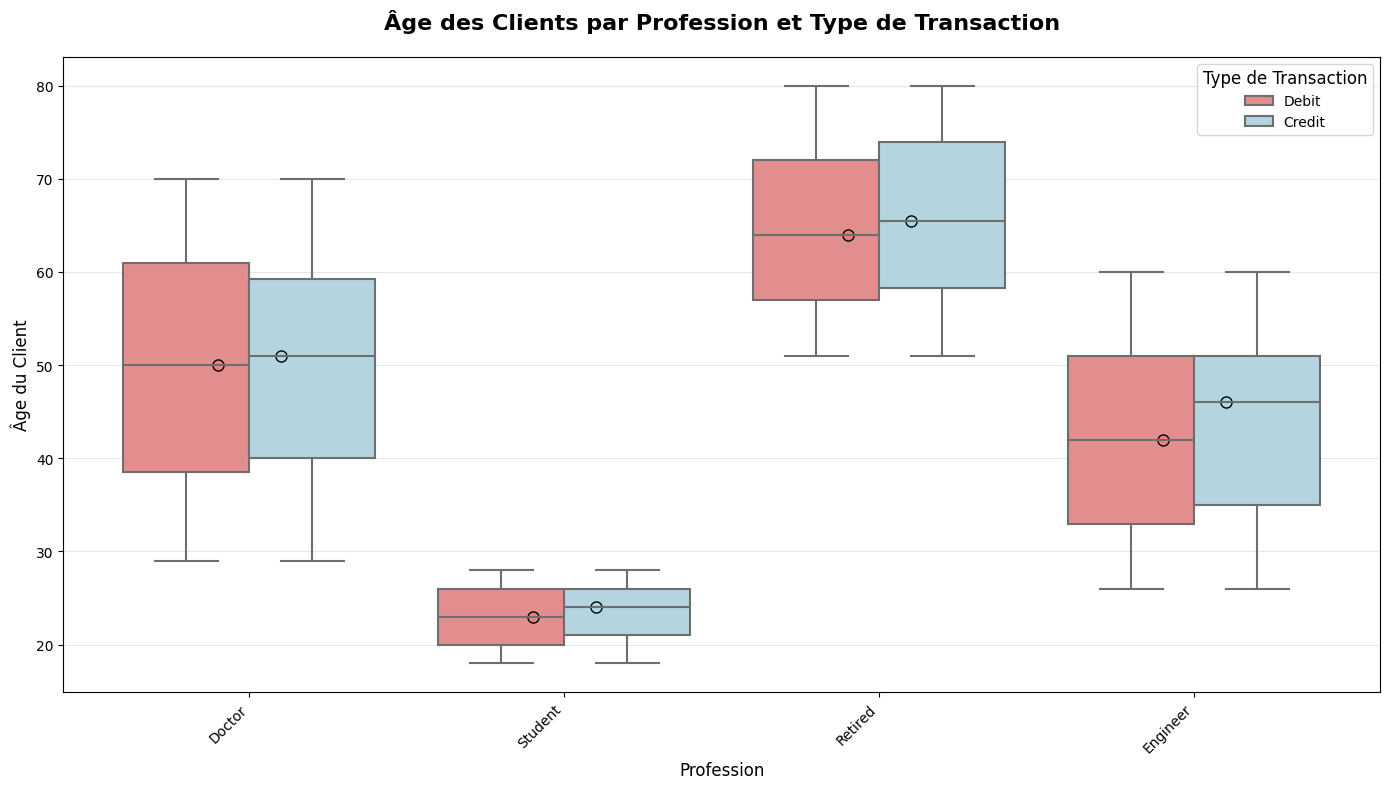

In [28]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='profession', y='age_client', hue='type_transaction',
            palette={'Debit': 'lightcoral', 'Credit': 'lightblue'},
            linewidth=1.5)

plt.title('Âge des Clients par Profession et Type de Transaction',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Profession', fontsize=12)
plt.ylabel('Âge du Client', fontsize=12)
plt.legend(title='Type de Transaction', title_fontsize=12, loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Ajouter les médianes pour plus de précision
professions = df['profession'].unique()
colors = {'Debit': 'lightcoral', 'Credit': 'lightblue'}
for i, profession in enumerate(professions):
    for j, transaction_type in enumerate(['Debit', 'Credit']):
        subset = df[(df['profession'] == profession) & (df['type_transaction'] == transaction_type)]
        if len(subset) > 0:
            median_age = subset['age_client'].median()
            plt.plot(i + j*0.2 - 0.1, median_age, 'o', markersize=8,
                    color=colors[transaction_type], markeredgecolor='black')

plt.tight_layout()
plt.show()

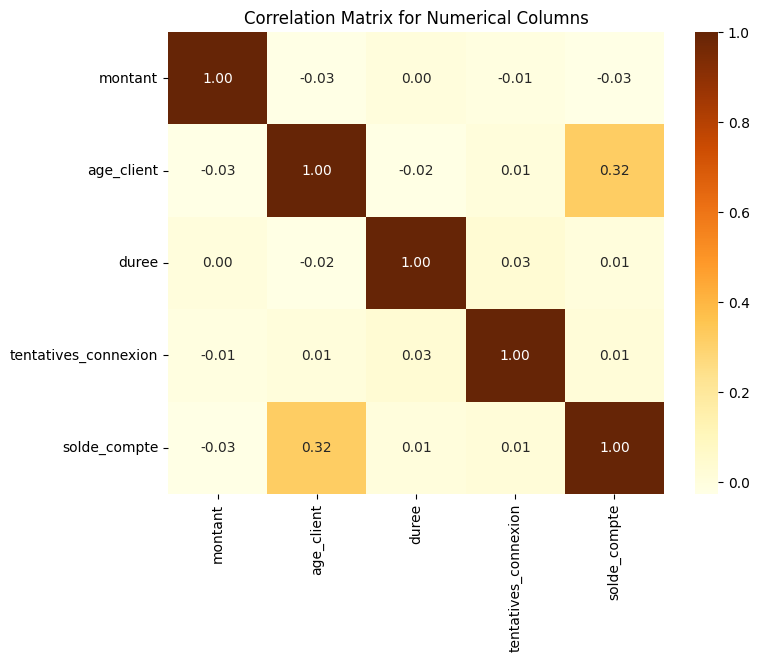

In [30]:
# Define the YlOrBr colormap
cmap = "YlOrBr"

# Display correlation matrix for numerical columns
correlation_matrix = df[num_var].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

# Selection des Features et Pré-processing de la base de données..

In [33]:
# Assurons-nous que toutes les features sont numériques
print("🔍 Vérification des types de données :")
print(df.dtypes)

🔍 Vérification des types de données :
id_transaction                       object
id_compte                            object
montant                             float64
date_transaction             datetime64[ns]
type_transaction                     object
ville                                object
id_appareil                          object
adresse_ip                           object
id_commercant                        object
canal                                object
age_client                            int64
profession                           object
duree                                 int64
tentatives_connexion                  int64
solde_compte                        float64
date_derniere_transaction            object
DayOfWeek                            object
dtype: object


In [37]:
# ---------------------------------------------------------------------------------
# 1. ANALYSE PRÉLIMINAIRE POUR ÉVITER LES ERREURS
# ---------------------------------------------------------------------------------
print("🔍 ANALYSE STATISTIQUE PRÉLIMINAIRE :")
print("="*50)

# Analyse de la durée
print("\n📊 Variable 'duree' :")
print(f"Min: {df['duree'].min()}s, Max: {df['duree'].max()}s")
print(f"Médiane: {df['duree'].median()}s")
print(f"Distribution: {df['duree'].describe().round(2)}")

# Analyse du délai entre transactions
print("\n📊 Délai entre transactions :")
delai_calcule = (pd.to_datetime(df['date_transaction']) - pd.to_datetime(df['date_derniere_transaction'])).dt.total_seconds()
print(f"Valeurs négatives: {(delai_calcule < 0).sum()} / {len(delai_calcule)}")
print(f"Pourcentage: {(delai_calcule < 0).sum()/len(delai_calcule)*100:.2f}%")

# ---------------------------------------------------------------------------------
# 2. FEATURE ENGINEERING UTILE SEULEMENT SI PERTINENT
# ---------------------------------------------------------------------------------
df_eng = df.copy()

# Conversion des dates
df_eng['date_transaction'] = pd.to_datetime(df_eng['date_transaction'])
df_eng['date_derniere_transaction'] = pd.to_datetime(df_eng['date_derniere_transaction'])

# 🔥 SEULEMENT les features qui apportent de la valeur
features_utiles = []

# 1. Délai entre transactions (UNIQUEMENT si pertinent)
delai_seconds = (df_eng['date_derniere_transaction'] - df_eng['date_transaction']).dt.total_seconds()
if (delai_seconds < 0).sum() > 10:  # Au moins 10 valeurs négatives
    df_eng['delai_negatif'] = (delai_seconds < 0).astype(int)
    features_utiles.append('delai_negatif')
    print("✅ 'delai_negatif' ajouté")
else:
    print("❌ 'delai_negatif' non ajouté (trop peu de valeurs)")

# 2. Heure et jour de la semaine (toujours utiles)
df_eng['heure_transaction'] = df_eng['date_transaction'].dt.hour
df_eng['jour_semaine'] = df_eng['date_transaction'].dt.dayofweek
features_utiles.extend(['heure_transaction', 'jour_semaine'])

# 3. Ratio montant/solde (toujours utile)
df_eng['solde_avant'] = df_eng['solde_compte'] + np.where(df_eng['type_transaction'] == 'Debit',
                                                         df_eng['montant'], -df_eng['montant'])
df_eng['solde_avant'] = df_eng['solde_avant'].clip(lower=0.01)  # Éviter division par zéro
df_eng['ratio_montant_solde'] = df_eng['montant'] / df_eng['solde_avant']
features_utiles.extend(['solde_avant', 'ratio_montant_solde'])

# 4. Tentatives de connexion anormales (seulement si pertinent)
if (df_eng['tentatives_connexion'] > 1).sum() > 10:
    df_eng['connexion_anormale'] = (df_eng['tentatives_connexion'] > 1).astype(int)
    features_utiles.append('connexion_anormale')
    print("✅ 'connexion_anormale' ajouté")
else:
    print("❌ 'connexion_anormale' non ajouté")

# ---------------------------------------------------------------------------------
# 3. ENCODAGE SEULEMENT DES VARIABLES ESSENTIELLES
# ---------------------------------------------------------------------------------
# Encodage minimaliste
canal_dummies = pd.get_dummies(df_eng['canal'], prefix='canal')
type_dummies = pd.get_dummies(df_eng['type_transaction'], prefix='type')
profession_dummies = pd.get_dummies(df_eng['profession'], prefix='prof')

df_encoded = pd.concat([df_eng, canal_dummies, type_dummies,profession_dummies], axis=1)
features_utiles.extend(canal_dummies.columns.tolist())
features_utiles.extend(type_dummies.columns.tolist())
features_utiles.extend(profession_dummies.columns.tolist())
# ---------------------------------------------------------------------------------
# 4. SÉLECTION FINALE AVEC VÉRIFICATION
# ---------------------------------------------------------------------------------
print(f"\n✅ FEATURES SÉLECTIONNÉES ({len(features_utiles)}) :")
for i, feature in enumerate(features_utiles, 1):
    print(f"{i:2d}. {feature}")

# Vérification que toutes les features existent
features_finales = [f for f in features_utiles if f in df_encoded.columns]
X = df_encoded[features_finales]

print(f"\n🎯 Dataset final: {X.shape}")
print("🔍 Aperçu des variables :")
for col in X.columns:
    unique_vals = X[col].nunique()
    print(f"  - {col}: {unique_vals} valeurs uniques")

🔍 ANALYSE STATISTIQUE PRÉLIMINAIRE :

📊 Variable 'duree' :
Min: 10s, Max: 300s
Médiane: 112.5s
Distribution: count    2512.00
mean      119.64
std        69.96
min        10.00
25%        63.00
50%       112.50
75%       161.00
max       300.00
Name: duree, dtype: float64

📊 Délai entre transactions :
Valeurs négatives: 2512 / 2512
Pourcentage: 100.00%
❌ 'delai_negatif' non ajouté (trop peu de valeurs)
✅ 'connexion_anormale' ajouté

✅ FEATURES SÉLECTIONNÉES (14) :
 1. heure_transaction
 2. jour_semaine
 3. solde_avant
 4. ratio_montant_solde
 5. connexion_anormale
 6. canal_ATM
 7. canal_Branch
 8. canal_Online
 9. type_Credit
10. type_Debit
11. prof_Doctor
12. prof_Engineer
13. prof_Retired
14. prof_Student

🎯 Dataset final: (2512, 14)
🔍 Aperçu des variables :
  - heure_transaction: 1 valeurs uniques
  - jour_semaine: 5 valeurs uniques
  - solde_avant: 2483 valeurs uniques
  - ratio_montant_solde: 2512 valeurs uniques
  - connexion_anormale: 2 valeurs uniques
  - canal_ATM: 2 valeurs 

In [38]:
X

,heure_transaction,jour_semaine,solde_avant,ratio_montant_solde,connexion_anormale,canal_ATM,canal_Branch,canal_Online,type_Credit,type_Debit,prof_Doctor,prof_Engineer,prof_Retired,prof_Student
0,0,1,5126.30,0.002749,0,True,False,False,False,True,True,False,False,False
1,0,1,14135.15,0.026617,0,True,False,False,False,True,True,False,False,False
2,0,0,1248.64,0.101142,0,False,False,True,False,True,False,False,False,True
3,0,4,8753.56,0.021077,0,False,False,True,False,True,False,False,False,True
4,0,0,7415.95,0.001814,0,False,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,0,2,11834.58,0.072348,0,False,True,False,True,False,True,False,False,False
2508,0,2,506.29,0.496830,0,False,True,False,False,True,True,False,False,False
2509,0,0,3411.54,0.008392,0,False,True,False,False,True,False,False,True,False
2510,0,4,1962.88,0.094743,0,False,False,True,False,True,False,False,False,True


In [39]:
from sklearn.preprocessing import RobustScaler

# Scaling des données (crucial pour Isolation Forest)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Données scaled shape:", X_scaled.shape)
print("📊 Aperçu après scaling:")
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.describe().round(2))

✅ Données scaled shape: (2512, 14)
📊 Aperçu après scaling:
       heure_transaction  jour_semaine  solde_avant  ratio_montant_solde  \
count             2512.0       2512.00      2512.00              2512.00   
mean                 0.0          0.15         0.07              6768.98   
std                  0.0          0.50         0.63             68641.79   
min                  0.0         -0.33        -0.79                -0.42   
25%                  0.0         -0.33        -0.51                -0.27   
50%                  0.0          0.00         0.00                 0.00   
75%                  0.0          0.67         0.49                 0.73   
max                  0.0          1.00         1.73           1161991.92   

       connexion_anormale  canal_ATM  canal_Branch  canal_Online  type_Credit  \
count             2512.00    2512.00       2512.00       2512.00      2512.00   
mean                 0.05       0.33          0.35          0.32         0.23   
std          

In [40]:
from sklearn.ensemble import IsolationForest

# Paramètres optimisés du modèle
iso_forest = IsolationForest(
    n_estimators=200,           # Nombre d'arbres
    contamination=0.02,         # Proportion estimée d'anomalies (~2%)
    max_samples=256,            # Taille des sous-échantillons
    random_state=42,            # Reproductibilité
    verbose=1,                  # Affichage de la progression
    n_jobs=-1                   # Utilisation de tous les CPU
)

print("🏋️‍♂️ Entraînement du modèle Isolation Forest en cours...")
iso_forest.fit(X_scaled)
print("✅ Modèle entraîné avec succès!")

🏋️‍♂️ Entraînement du modèle Isolation Forest en cours...


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


✅ Modèle entraîné avec succès!


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


In [41]:
# Calcul des scores d'anomalie
scores_anomalie = iso_forest.decision_function(X_scaled)
predictions = iso_forest.predict(X_scaled)  # -1 = anomalie, 1 = normal

# Ajout au DataFrame original
df['score_anomalie'] = scores_anomalie
df['anomalie_detectee'] = predictions

# Analyse des résultats
n_anomalies = (df['anomalie_detectee'] == -1).sum()
pourcentage_anomalies = n_anomalies / len(df) * 100

print(f"\n🔍 RÉSULTATS DE DÉTECTION :")
print(f"Anomalies détectées : {n_anomalies}")
print(f"Pourcentage : {pourcentage_anomalies:.2f}%")
print(f"Score d'anomalie moyen : {scores_anomalie.mean():.4f}")
print(f"Score min : {scores_anomalie.min():.4f}")
print(f"Score max : {scores_anomalie.max():.4f}")


🔍 RÉSULTATS DE DÉTECTION :
Anomalies détectées : 51
Pourcentage : 2.03%
Score d'anomalie moyen : 0.1144
Score min : -0.0900
Score max : 0.1713


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


In [42]:
# 4. Analyse des Anomalies Détectées


# Transactions les plus suspectes
anomalies = df[df['anomalie_detectee'] == -1].sort_values('score_anomalie')

print("\n🏆 TOP 10 des transactions les plus anormales:")
top_anomalies = anomalies.head(10)[['montant', 'type_transaction', 'canal', 'profession',
                                  'tentatives_connexion', 'score_anomalie']]

# Ajouter les features engineered depuis df_encoded
top_anomalies = top_anomalies.join(df_encoded[['ratio_montant_solde', 'connexion_anormale']], how='left')

print(top_anomalies.round(4))

# Analyse comparative
print("\n📈 COMPARAISON ANOMALIES vs NORMAL :")
anomalies_extended = anomalies.join(df_encoded[['ratio_montant_solde', 'connexion_anormale']], how='left')
normal_extended = df[df['anomalie_detectee'] == 1].join(df_encoded[['ratio_montant_solde', 'connexion_anormale']], how='left')

print(f"• Montant moyen : {anomalies_extended['montant'].mean():.2f} vs {normal_extended['montant'].mean():.2f}")
print(f"• Tentatives connexion : {anomalies_extended['tentatives_connexion'].mean():.2f} vs {normal_extended['tentatives_connexion'].mean():.2f}")
print(f"• Ratio montant/solde : {anomalies_extended['ratio_montant_solde'].mean():.4f} vs {normal_extended['ratio_montant_solde'].mean():.4f}")
print(f"• Connexion anormale : {anomalies_extended['connexion_anormale'].mean():.2%} vs {normal_extended['connexion_anormale'].mean():.2%}")
print(f"• Âge moyen : {anomalies_extended['age_client'].mean():.1f} vs {normal_extended['age_client'].mean():.1f}")

# Répartition par catégories
print("\n📊 RÉPARTITION DES ANOMALIES :")
print("Par type de transaction :")
print(anomalies['type_transaction'].value_counts())
print("\nPar canal :")
print(anomalies['canal'].value_counts())
print("\nPar profession :")
print(anomalies['profession'].value_counts())

# Analyse des caractéristiques des anomalies
print("\n🔍 CARACTÉRISTIQUES DES ANOMALIES :")
print(f"Nombre d'anomalies avec connexion anormale : {(anomalies_extended['connexion_anormale'] == 1).sum()}")
print(f"Nombre d'anomalies avec ratio > 0.5 : {(anomalies_extended['ratio_montant_solde'] > 0.5).sum()}")
print(f"Nombre d'anomalies avec montant > 1000 : {(anomalies_extended['montant'] > 1000).sum()}")


🏆 TOP 10 des transactions les plus anomalies :
      montant type_transaction   canal profession  tentatives_connexion  \
274   1176.28           Credit     ATM   Engineer                     5   
2124   737.46           Credit  Branch     Doctor                     4   
543    552.02           Credit     ATM   Engineer                     1   
1281  1397.59           Credit     ATM    Student                     1   
934   1022.75           Credit  Branch     Doctor                     1   
614   1342.25           Credit  Branch    Student                     1   
1075  1156.18           Credit  Online     Doctor                     1   
1857   720.13           Credit     ATM    Student                     1   
1575   732.53           Credit     ATM    Student                     1   
248    842.01           Credit  Online     Doctor                     1   

      score_anomalie  ratio_montant_solde  connexion_anormale  
274          -0.0900             117628.0                   1 

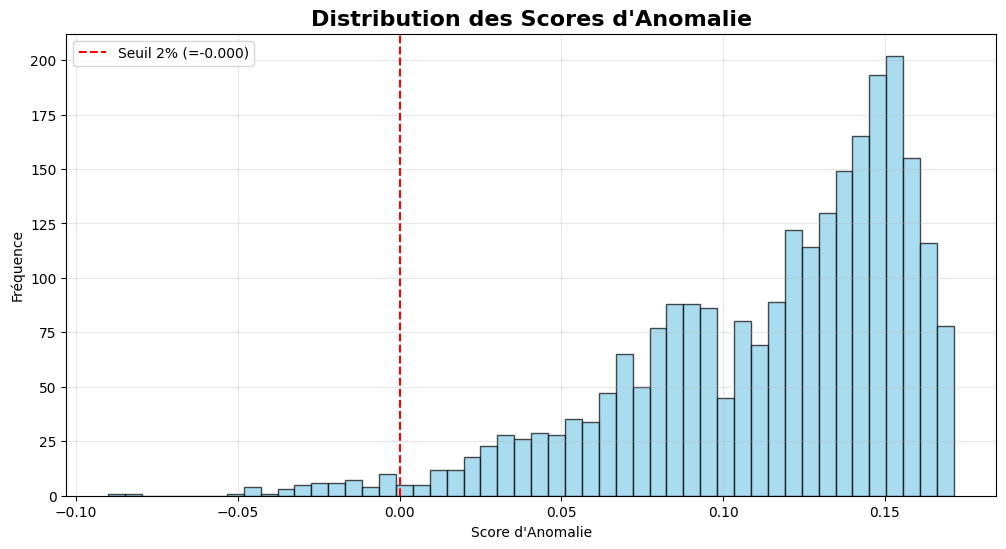

/tmp/ipython-input-3846804987.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type_transaction', y='score_anomalie',


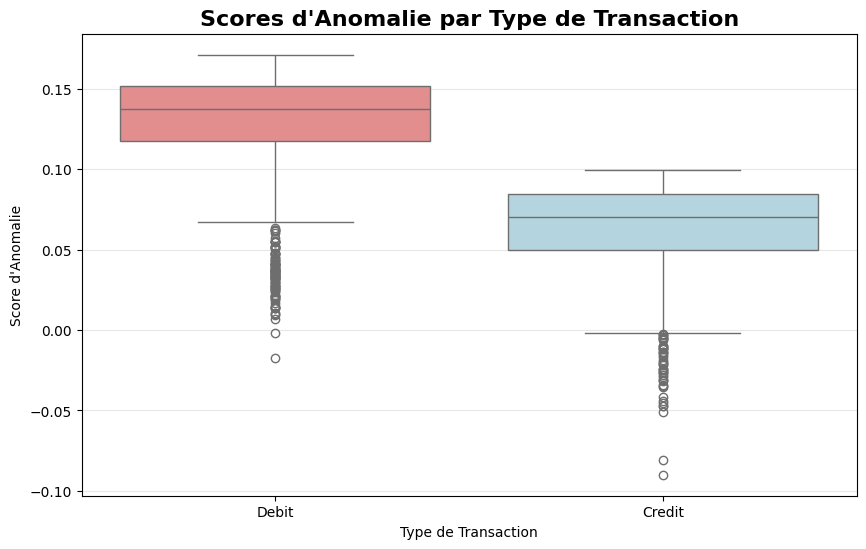

In [43]:
import matplotlib.pyplot as plt

# Distribution des scores d'anomalie
plt.figure(figsize=(12, 6))
plt.hist(scores_anomalie, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=np.percentile(scores_anomalie, 2), color='red', linestyle='--',
            label=f'Seuil 2% (={np.percentile(scores_anomalie, 2):.3f})')
plt.title('Distribution des Scores d\'Anomalie', fontsize=16, fontweight='bold')
plt.xlabel('Score d\'Anomalie')
plt.ylabel('Fréquence')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Boxplot des scores par type de transaction
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type_transaction', y='score_anomalie',
            palette={'Debit': 'lightcoral', 'Credit': 'lightblue'})
plt.title('Scores d\'Anomalie par Type de Transaction', fontsize=16, fontweight='bold')
plt.xlabel('Type de Transaction')
plt.ylabel('Score d\'Anomalie')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [46]:
df

,id_transaction,id_compte,montant,date_transaction,type_transaction,ville,id_appareil,adresse_ip,id_commercant,canal,age_client,profession,duree,tentatives_connexion,solde_compte,date_derniere_transaction,DayOfWeek,score_anomalie,anomalie_detectee
0,TX000001,AC00128,14.09,2023-04-11,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,Tuesday,0.140369,1
1,TX000002,AC00455,376.24,2023-06-27,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,Tuesday,0.125420,1
2,TX000003,AC00019,126.29,2023-07-10,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,Monday,0.161477,1
3,TX000004,AC00070,184.50,2023-05-05,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,Friday,0.072313,1
4,TX000005,AC00411,13.45,2023-10-16,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,Monday,0.059602,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29,Wednesday,0.063487,1
2508,TX002509,AC00322,251.54,2023-03-22,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42,Wednesday,0.073214,1
2509,TX002510,AC00095,28.63,2023-08-21,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39,Monday,0.149176,1
2510,TX002511,AC00118,185.97,2023-02-24,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22,Friday,0.120607,1
